In [145]:
import json
import pandas as pd
from bokeh.charts import Histogram, output_notebook, show
import numpy as np
import csv
import matplotlib.pyplot as plt


plt.style.use('ggplot')
%matplotlib inline
time_data=open("event_slice_length.json").read()
user_profile_data= open("BerkeleyX-Stat_2.1x-1T2014-auth_userprofile-prod-analytics.sql")
country_profile=open("country_profile.json").read()

In [146]:

time_slice=json.loads(time_data)
time_as_lists=np.asarray(list((time_slice).values()))

time_as_sorted=np.sort(time_as_lists)
len(time_as_sorted)
q75, q25 = np.percentile(time_as_sorted, [75 ,25])
IQR= q75 - q25
lower_bound= q25-(1.5*IQR)

upper_bound=q75+(1.5*IQR)
time_outlier_free=[]
outliers=[]
for i in time_as_sorted:
    if i>=lower_bound and i<=upper_bound:
        time_outlier_free.append(i)
    else:
        outliers.append(i)

print ("Total number of users with a problem check event")
print (len(time_as_sorted))
print ("Median of the all timelines of users with problem check event including outliers")
print (np.median(time_as_sorted))
print ("Upper bound of time slice after eliminating outliers")
print (time_outlier_free[-1])
print ("Lower bound of time slice after eliminating outliers %s")
print ( time_outlier_free[-0])
print ("Total number of users after eliminating outliers")
print (len(time_outlier_free))
print ("Median number of timeslice after eliminating outliers")
print (np.median(time_outlier_free))


print("Total number of outliers")
print (len(outliers))
print ("Upper bound of outlier")
print (outliers[-1])
print ("Lower bound of outlier")
print (outliers[0])
#timeslice=val.values()


Total number of users with a problem check event
13520
Median of the all timelines of users with problem check event including outliers
178.0
Upper bound of time slice after eliminating outliers
1209
Lower bound of time slice after eliminating outliers %s
5
Total number of users after eliminating outliers
12337
Median number of timeslice after eliminating outliers
151.0
Total number of outliers
1183
Upper bound of outlier
59057
Lower bound of outlier
1211


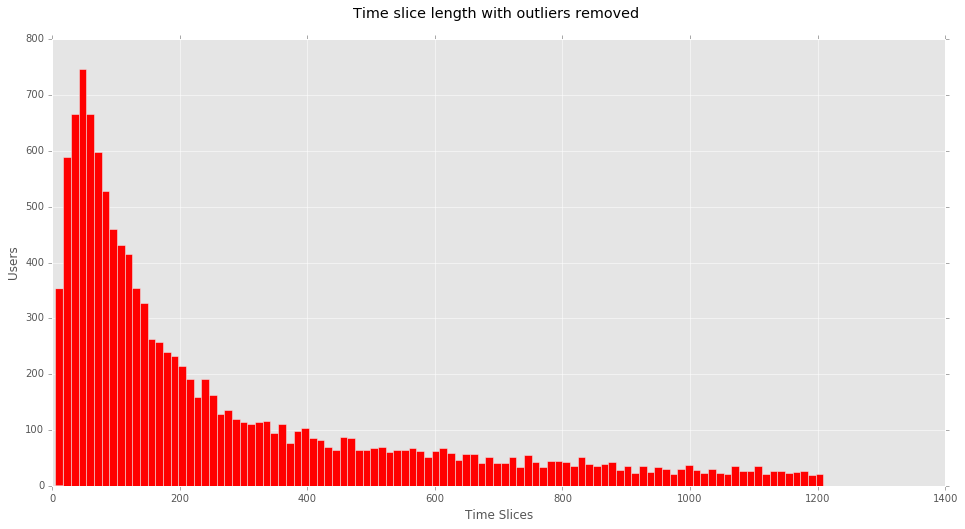

In [147]:
# Time slice Histogram with outliers removed
df =pd.DataFrame(time_outlier_free)
df.hist(bins=100, color="red", figsize=(16,8))
plt.title ("Time slice length with outliers removed \n")
plt.xlabel("Time Slices")
plt.ylabel("Users")



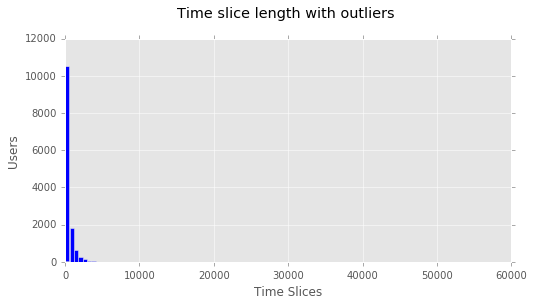

In [148]:
#Time Slice histogram with all outliers
df_outlied=pd.DataFrame(time_as_sorted)
df_outlied.hist(bins=100, figsize=(8,4), color="blue")
plt.title("Time slice length with outliers \n")
plt.xlabel("Time Slices")
plt.ylabel("Users")


In [149]:
#User profile data for all students as per user profile for all students in program window

user_profile= csv.reader(user_profile_data, delimiter="\t")
data_profile=pd.read_csv("BerkeleyX-Stat_2.1x-1T2014-auth_userprofile-prod-analytics.sql", delimiter="\t")


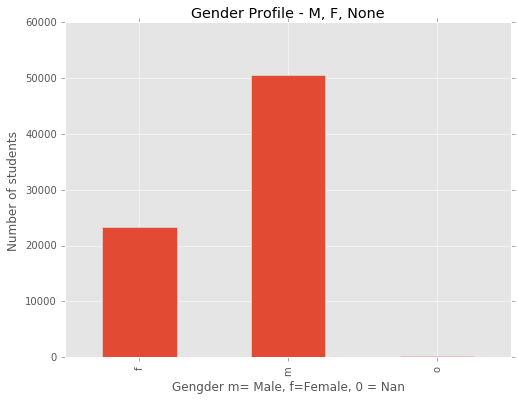

In [150]:

#Gender
data_profile.groupby("gender").count()["id"].plot(kind="bar", figsize=(8,6))
plt.title ("Gender Profile - M, F, None")
plt.xlabel("Gengder m= Male, f=Female, 0 = Nan")
plt.ylabel("Number of students")


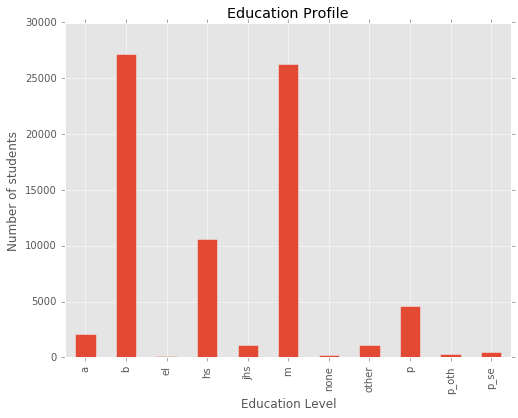

In [151]:
#Education

data_profile.groupby("level_of_education").count()["id"].plot(kind="bar", figsize=(8,6))
plt.title ("Education Profile")
plt.xlabel("Education Level")
plt.ylabel("Number of students")


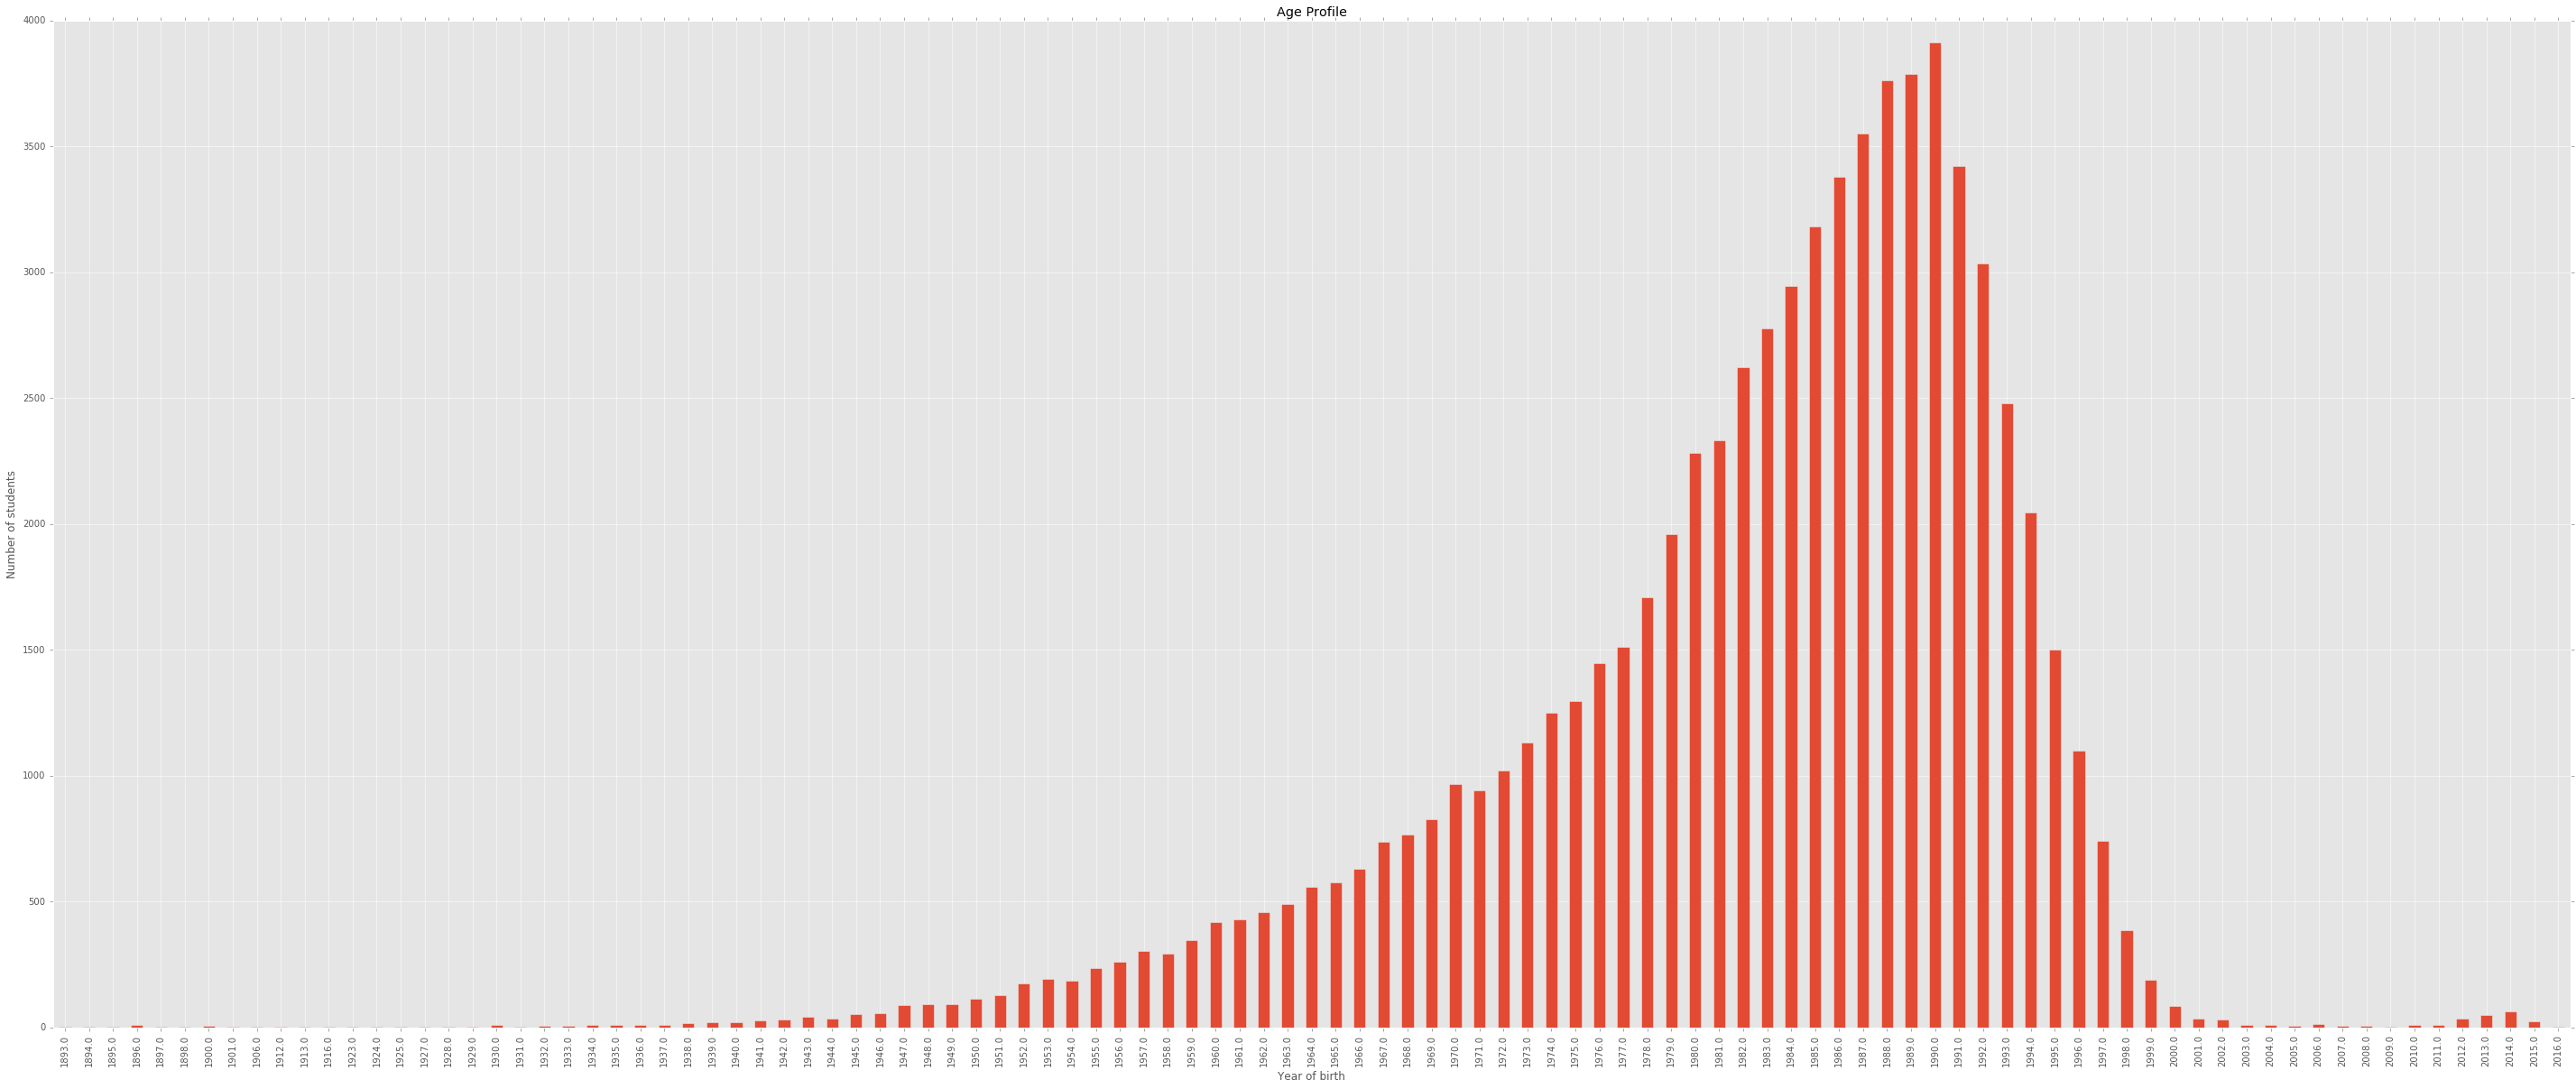

In [152]:

#Age
data_profile.groupby("year_of_birth").count()["id"].plot(kind="bar", figsize=(50,20))
plt.title ("Age Profile")
plt.xlabel("Year of birth")
plt.ylabel("Number of students")

In [153]:

#Load data for country for students who have attampted the problems

country_dat=json.loads(country_profile)
country_as_lists=np.asarray(list((country_dat).values()))

bin_val=len(np.unique(country_as_lists))



In [154]:
cf =pd.DataFrame({'country':country_as_lists, 'ones':np.ones(13520)})


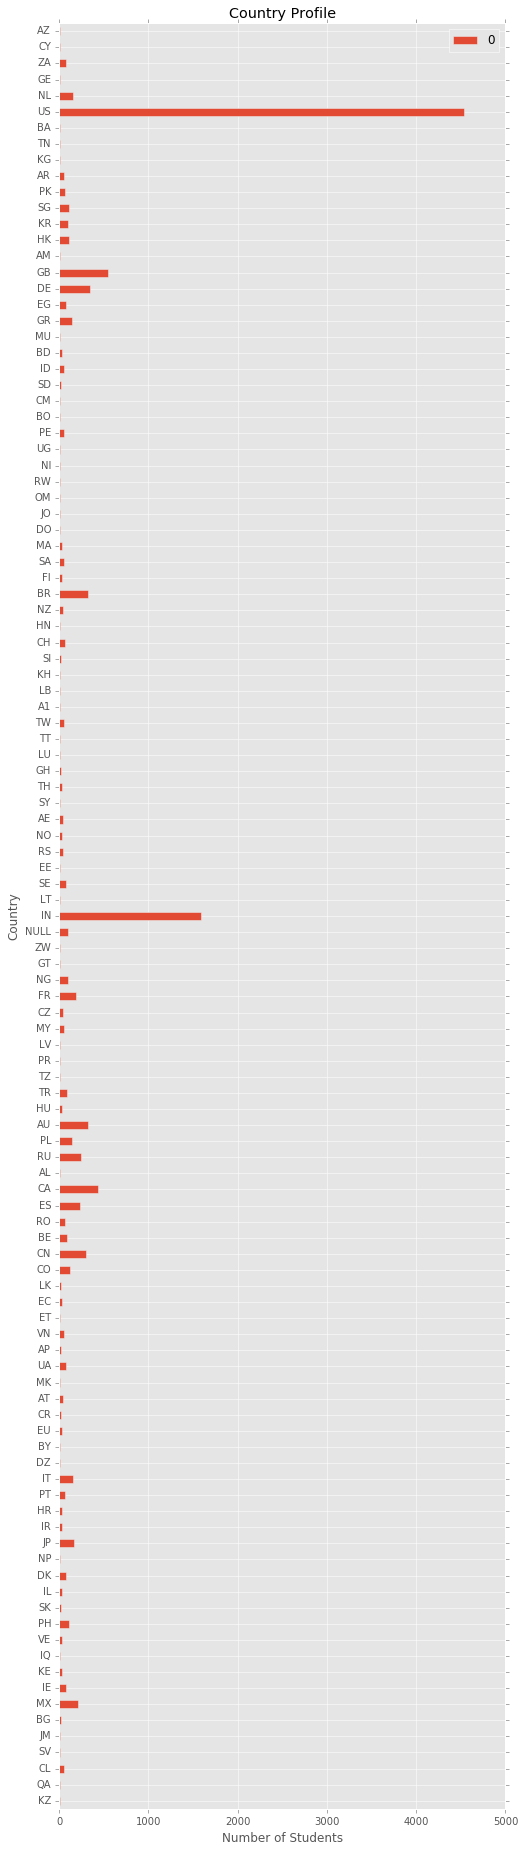

In [155]:
#Generate a histogram after removing values where there are less than 3 users per country (arbitrary)


kd=cf.groupby("country").count()["ones"].to_dict()


country_after_removing_less={}
count_removed=0
for i in kd:
    if kd[i]>=5:
        country_after_removing_less[i]=kd[i]
    else:
        count_removed+=1

county_after_outlier=pd.DataFrame.from_dict(country_after_removing_less, orient="index")
county_after_outlier.plot(kind="barh", figsize=(8, 32))

plt.title ("Country Profile")
plt.xlabel("Number of Students")
plt.ylabel("Country")
